## 10p twitter api live sentiment

In [8]:
import tweepy
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from pandasql import sqldf
import numpy as np

In [9]:
consumer_key = "3Ri7wGgGyg3MU9HDFIFuXhpsB"
consumer_secret = "U71KtVtVcx73EABu92B5ZOiI7hm9M2S7xZet5nv1jUrZQp7TJZ"

auth = tweepy.OAuthHandler(consumer_key = consumer_key, consumer_secret = consumer_secret)

api = tweepy.API(auth)

In [3]:
results = []
for tweet in tweepy.Cursor(api.search, q = "Red Sox").items(300):
    results.append(tweet)

print(len(results))

300


In [4]:
def process_results(results):
    id_list = [tweet.id for tweet in results]
    data_set = pd.DataFrame(id_list, columns = ['id'])
    
    # tweet data
    data_set['text'] = [tweet.text for tweet in results]
    data_set['created_at'] = [tweet.created_at for tweet in results]
    data_set['retweet_count'] = [tweet.retweet_count for tweet in results]
    data_set['favorite_count'] = [tweet.favorite_count for tweet in results]
    data_set['source'] = [tweet.source for tweet in results]
    
    # user data
    data_set['user_id'] = [tweet.author.id for tweet in results]
    data_set['user_screen_name'] = [tweet.author.screen_name for tweet in results]
    data_set['user_name'] = [tweet.author.name for tweet in results]
    data_set['user_created_at'] = [tweet.author.created_at for tweet in results]
    data_set['user_description'] = [tweet.author.description for tweet in results]
    data_set['user_followers_count'] = [tweet.author.followers_count for tweet in results]
    data_set['user_friends_count'] = [tweet.author.friends_count for tweet in results]
    data_set['user_location'] = [tweet.author.location for tweet in results]
    
    return(data_set)

data_set = process_results(results)



In [5]:
data_set.head()

,id,text,created_at,retweet_count,favorite_count,source,user_id,user_screen_name,user_name,user_created_at,user_description,user_followers_count,user_friends_count,user_location
0,786669726126702592,"@TheSixFinger @dylan_275 as a Red Sox fan, it ...",2016-10-13 20:47:32,0,2,Twitter Web Client,15813075,deliciousmalk,Laszlo Panaflex,2008-08-11 20:03:29,The internet? On computers? We are truly livin...,272,540,"Chicago, IL"
1,786669722125361153,Boston Red Sox 47 Brand Clean Up Hat Adjustabl...,2016-10-13 20:47:32,0,0,IFTTT,2993407780,iftttinfo,searches,2015-01-23 01:26:10,,2,0,
2,786669689485324288,@RedSox 2B Pedroia has left knee surgery. http...,2016-10-13 20:47:24,0,0,Twitter Web Client,16521206,NBC10,NBC 10 WJAR,2008-09-30 00:36:10,Turn to 10 for news and weather coverage for R...,70621,516,"Providence, Rhode Island"
3,786669517996892160,Explains a lot! Guy is tough! RT @BDCSox: Red ...,2016-10-13 20:46:43,0,0,TweetCaster for iOS,81644173,SMarsh7818,Sheryl Marshall,2009-10-11 17:38:56,Excited to be working for @C4CBoston & Coyle &...,647,1243,"ÜT: 41.881341,-71.094429"
4,786669499176980480,@CatherineBogart I want this and you also owe ...,2016-10-13 20:46:38,0,1,Twitter for iPhone,515629507,Shapalicious,Jake Shapiro,2012-03-05 16:35:16,Colorado Buffaloes editor and Colorado Rockies...,1394,1175,"Boulder, Colorado"


## Top 5 locations

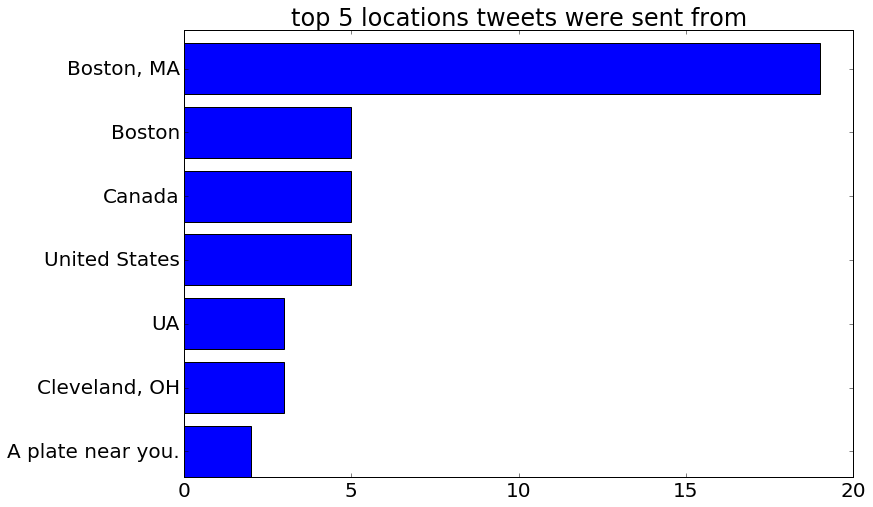

In [10]:
location_plot = data_set['user_location'].value_counts()[1:8][::-1]

plt.figure(figsize=(12, 8), dpi = 100)
plt.barh(range(len(location_plot)), location_plot.values)
plt.yticks(np.arange(len(location_plot)) + 0.4, location_plot.index, size = 20)
plt.xticks(size = 20)
plt.title("top 5 locations tweets were sent from", size = 24)
plt.show()

In [ ]:
import numpy as np
location_plot = data_set['source'].value_counts()[:5][::-1]
plt.figure(figsize=(12, 8), dpi = 100)
plt.barh(range(len(location_plot)), location_plot.values)
plt.yticks(np.arange(len(location_plot)) + 0.4, location_plot.index, size = 20)
plt.xticks(size = 20)
plt.title("top 5 sources used to send tweets", size = 24)
plt.show()

## Number of users in Boston and/or MA 

In [ ]:
loc_query = """SELECT distinct(user_location) as location,
            count(user_location), user_screen_name
            FROM data_set
            WHERE user_location LIKE '%Boston%'
            OR user_location LIKE '%MA'
            GROUP BY location
            ORDER BY count(location) DESC"""
print(sqldf(loc_query, locals()))

In [ ]:
import re
searchstring = ''.join(str(e) for e in data_set['text'])
searchstring = re.sub(r"<a\S+", "", searchstring)
cleansearchstring = str(re.sub('\W+',',', searchstring))
keys = cleansearchstring.split(",")

In [ ]:
word_counts = {}
for word in keys:
    word = word.lower()
    if word in word_counts:
        word_counts[word] += 1
    else:
        word_counts[word] = 1

In [ ]:
filtersearch = {k: v for k, v in word_counts.items() if v > 15}

In [ ]:
stopwords = ['x80','x83','x8a','x8c',
            'x8d','x8e','x8f','x91',
            'x92','x93','x94','x9a',
            'x9c','x9f','xa3','xa6',
            'xaa','xb8','xba','xbe',
            'xe2','xef','xf0','a',
            'all','amp','are','as',
            'at','b','back','be',
            'been','but','can','co','n',
            'now','of','off','on','our',
            'out', 'and', 't', 's', 
            'https', 'the', 'for', 'in', 
            'is', 'it', 'to', 'The', 'We',
            'this', 'with', 'you', 'that', 
            'there', 'your', 'like', 'i',
            'am', 'me', 'rt', 'm', 'dtype', 'thing',
             'or', 'so','we', 'will', 'get', 'have', 'too',
            'my', 'if']


# build a list of keys (badword) that need removing, then remove them.
# http://stackoverflow.com/questions/5447494/best-way-to-remove-an-item-from-a-python-dictionary

keys_to_remove = [key for key, value in filtersearch.items()
                  if key in stopwords]
for key in keys_to_remove:
    del filtersearch[key]

In [ ]:
# Transform the dictionary filteroct6 into a pandas data frame in order to plot
dict_df = pd.DataFrame([filtersearch])
dict_df = dict_df.T
dict_df["Words"] = dict_df.index
dict_df['count'] = dict_df[0]
del dict_df[0]

In [ ]:
# plot the new df generated from dictionary
dict_df.plot(dict_df['Words'], kind= 'barh', colormap = 'cool', alpha = .6, grid = 'on', figsize = (28,16), legend = False, rot=0)
plt.yticks(size = 20)
plt.xticks(size = 24)
plt.ylabel('')
plt.title('Counting the occurrence of relevant words in @RedSox tweets', size = 30)
plt.show()

In [ ]:
count = """SELECT Words, count
            FROM dict_df
            ORDER BY count DESC"""
print(sqldf(count, locals()))

In [ ]:
from os import path
from wordcloud import WordCloud
from scipy.misc import imread
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [ ]:
content = str(dict_df['Words'])
CleanContent = content

In [ ]:
wordcloud = WordCloud(relative_scaling=.1).generate(CleanContent)
plt.figure(figsize=(20, 15), dpi = 100)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [ ]:
state_coloring = imread('/Users/shanepiesik/Documents/Python II/10p/670')

In [ ]:
wc = WordCloud(background_color="white", max_words=2000, mask=state_coloring,
               stopwords=STOPWORDS.add("said"),
               max_font_size=40, random_state=42)
# generate word cloud
wc.generate(CleanContent)


In [ ]:
# create coloring from image
image_colors = ImageColorGenerator(state_coloring)

# we could also give color_func=image_colors directly in the constructor
plt.imshow(wc.recolor(color_func=image_colors))
plt.axis("off")
plt.figure()